In [ ]:
!pip install plotly==5.8.0

In [ ]:
# Importing all libraries :

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

import plotly.graph_objects as go

In [273]:
import pandas as pd

df = pd.read_excel('W25530-XLS-ENG.xlsx')

df.head(5)

,Unnamed: 0,Unnamed: 1,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,1,NaN,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875
1,2,NaN,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500
2,3,NaN,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430
3,4,NaN,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375
4,5,NaN,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813


In [ ]:
df.isna().sum()

#No Missing Values were found so continuing

Unnamed: 0     0
Unnamed: 1    70
Player         0
Team           0
Runs           0
Avg            0
SR             0
Hundreds       0
Fifties        0
Fours          0
Sixes          0
Salary         0
dtype: int64

In [274]:
# Removing 'Unamed: 1' column as all values are null, so better to remove it.

df.dropna(how='any', axis=1, inplace = True)
# df.drop('Unamed: 1', inplace=True, axis=1)
# Renaming 'Unamed: 0' to 'Sno' (serial no)
df.rename(columns = {'Unnamed: 0':'Sno'}, inplace = True)

df.head(5)

,Sno,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,1,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875
1,2,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500
2,3,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430
3,4,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375
4,5,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813



For given data you have to measure the performance of the players based on previously provided data. Based on the performance you have to develop the following:

i.  important questions 

ii. measure of performance

iii. Develop hypothesis and perform 
experiments

iv. Develop predictive models

v. Develop plots for the knowledge insights.


important questions 

Q1) In what context or for whom the performance is being measured?

Q2) What are the objectives or why the performance is being measured?

Q3) Is the measured performance alligning with the objectives?

Q4) how is the performance measured?

Q5) how can we validate our measured performance?

Q6) Whats the most important feature/variable involved while measuring performance?

Q7) What will be the method for calculating performance?

Q8) does the calculation of performance involves single or multiple features/variables?

Measure of perforamnce & hypothesis and expreiements

The performance cannot be directly measured, first of all it should be known that for what audience or stake holders the performance is being measured and what is thier interest.

So following are some hypothesis in regards to the stake holders that wants to select a team and needs a captain,openers, middle order batsmen and bowlers that would complete their respective teams the hypothesis further defines each category **performance criterias**.

[ NOTE: the data is highly reflecting only the properties related to a batsmen, hence, 
1) captains selected is a batsmen primararily.
2) SR is below 120.00. ]

hypothesis:

1) For a captain he may have

*   an average above 40
*   atleast have a 100 or 50 (to know    that he is experienced)
*   no. of fours are more compared to sixes (to show that he plays non aggressive and sensible shots). 

2) Openers should be aggressive and make complete use of powerplay so, 

*   above 150.00 SR
*   above 40.00 Avg

3) middle order main objective is slow and steady batting and chasing the score so, 
*   high averages above 40
*   runs above 150

4) (read Note above) bowlers should have an SR below 120.


 


In [ ]:
test1 = df.loc[(df['Avg'] > 40)]
test1 = test1.loc[(test1['Hundreds'] + test1['Fifties']) > 0]
test1 = test1.loc[test1['Fours'] > test1['Sixes']]

print("No. of potential Captains are: ", len(test1))

temp = test1['Player']

fig = go.Figure(data=[
    go.Bar(name='Runs', x=temp, y=test1['Runs']),
    go.Bar(name='Strike Rate', x=temp, y=test1['SR']),
    go.Bar(name='Average', x=temp, y=test1['Avg'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

No. of potential Middle-Order Batsmen are:  7


In [ ]:
test2 = df.loc[(df['SR'] > 150)]
test2 = test2.loc[(test2['Avg'] > 40)]

print("No. of potential Openers are: ", len(test2))

temp = test2['Player']

fig = go.Figure(data=[
    go.Bar(name='Runs', x=temp, y=test2['Runs']),
    go.Bar(name='Strike Rate', x=temp, y=test2['SR']),
    go.Bar(name='Average', x=temp, y=test2['Avg'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

No. of potential Middle-Order Batsmen are:  5


In [ ]:
test3 = df.loc[(df['Runs'] > 150)]
test3 = test3.loc[(test3['Avg'] > 40)]

print("No. of potential Middle-Order Batsmen are: ", len(test3))

temp = test3['Player']

fig = go.Figure(data=[
    go.Bar(name='Runs', x=temp, y=test3['Runs']),
    go.Bar(name='Strike Rate', x=temp, y=test3['SR']),
    go.Bar(name='Average', x=temp, y=test3['Avg'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

No. of potential Middle-Order Batsmen are:  12


In [ ]:
test4 = df.loc[(df['SR'] < 120)]

print("No. of potential Bowlers are: ", len(test4))

temp = test4['Player']

fig = go.Figure(data=[
    go.Bar(name='Runs', x=temp, y=test4['Runs']),
    go.Bar(name='Strike Rate', x=temp, y=test4['SR']),
    go.Bar(name='Average', x=temp, y=test4['Avg'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


No. of potential Bowlers are:  16


Develop predictive Models


Predictive modelling is done in order to predict the salaries of each Player in accordance with the features/variables provided for them.

The steps included are as follows:

[Note: model used for the following is logistic regression]

1) Data preprocessing (cleaning the data, which is already done before visualization)

2) Feature engineering (is the step where predictor variables are decided for the model) 

*   Sno, Team, Players columns are of no use so we will be remove it as we are 
evaluating invidual salaries of players based on performance and textual is of no use.
*   To see which feature/variable has highest correlation with salary.
*   Using recursive feature engineering we will be selecting the most dependent variables for the model.

3) Training and ssplitting into 75:25

4) Evaluating our model performance.

*   First we will select all features for model and evaluate perforamce.
*   Now we will use RFE technique to select most important features, and then evaluate it.





In [ ]:
corr_data = df[['Salary ', 'Runs','Avg','SR', 'Hundreds','Fifties', 'Fours', 'Sixes']]
corr_data_corrs = corr_data.corr()

import plotly.express as px

fig = px.imshow(corr_data_corrs, text_auto=True)
fig.show()

In [ ]:
use = df.drop("Sno",axis=1)
use = use.drop("Player",axis=1)
use = use.drop("Team",axis=1)


use.head(5)

,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,442,44.20,154.00,0,5,31,26,1.71875
1,393,32.75,137.89,1,1,45,9,0.62500
2,61,12.20,107.01,0,0,5,2,0.51430
3,282,23.50,93.06,0,1,20,7,0.34375
4,510,56.66,204.81,0,4,31,52,1.32813


In [ ]:
df_train, df_test = train_test_split(use, train_size = 0.75, test_size = 0.25, random_state = 100)

In [ ]:
df_train.shape

(52, 8)

In [ ]:
df_test.shape

(18, 8)

In [ ]:
y_train = df_train.pop('Salary ')
X_train = df_train

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)


In [ ]:
model.intercept_

0.7630788590927278

In [ ]:
model.coef_

array([ 0.00194719,  0.00116413, -0.00161705,  0.21361554,  0.04702096,
       -0.00674361, -0.01044003])

In [ ]:
y_test = df_test.pop('Salary ')

X_test = df_test


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
import sklearn

mse = sklearn.metrics.mean_squared_error(y_test, y_pred2)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred2))
print("The previous Mean Squares Error was: 4.430416020688372e+22")
print("The previous R-2 score was: -3.829047511137639e+22")

The Mean Squares Error is:  0.2492118660520038
The R-2 score is:  0.12381895994554926
The previous Mean Squares Error was: 4.430416020688372e+22
The previous R-2 score was: -3.829047511137639e+22


Now using RFE technique, (selecting at most 2 features only)

In [ ]:
LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=2, step=10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.n_features_

2

In [ ]:
list(zip(X_train.columns, rfe.support_ ,rfe.ranking_))

[('Runs', False, 2),
 ('Avg', False, 2),
 ('SR', False, 2),
 ('Hundreds', True, 1),
 ('Fifties', True, 1),
 ('Fours', False, 2),
 ('Sixes', False, 2)]

In [ ]:
cols = X_train.columns[rfe.support_]
cols

Index(['Hundreds', 'Fifties'], dtype='object')

In [ ]:
X_test2 = X_test[cols]                                                                                                                            
y_pred2 = rfe.predict(X_test)

In [ ]:
import sklearn

mse = sklearn.metrics.mean_squared_error(y_test, y_pred2)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred2))
print("The previous Mean Squares Error was: 4.430416020688372e+22")
print("The previous R-2 score was: -3.829047511137639e+22")


The Mean Squares Error is:  0.248235087956295
The R-2 score is:  0.12725312406204414
The previous Mean Squares Error was: 4.430416020688372e+22
The previous R-2 score was: -3.829047511137639e+22


In [ ]:
import sklearn

LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
rfe.n_features_
y_pred_ = rfe.predict(X_test)


mse = sklearn.metrics.mean_squared_error(y_test, y_pred_)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred_))

The Mean Squares Error is:  0.2492118660520038
The R-2 score is:  0.12381895994554926


Hence, selecting 2 features has higher accuracy(R2 score) than other possible combinations.

Knowledge Graphs


is entity relationship graphs that show some kind real world modelling, It is a powerful way of representing data because Knowledge Graphs can be built automatically and can then be explored to reveal new insights about the domain.


Similarly, here we can show the different hypothesis we created in the form of graphs as all potential players belonging to some category as an example,

Yousuf Pathan  --> is a -->   bowler.
  {Subject}    {Predicate}  {Object}

Knowledge Graphs are as follows:

1) Players for each Team
2) Potential players for Captaincy
3) Potential players for Opening
4) Potential players for Middle Order
5) Potential players for Bowlers

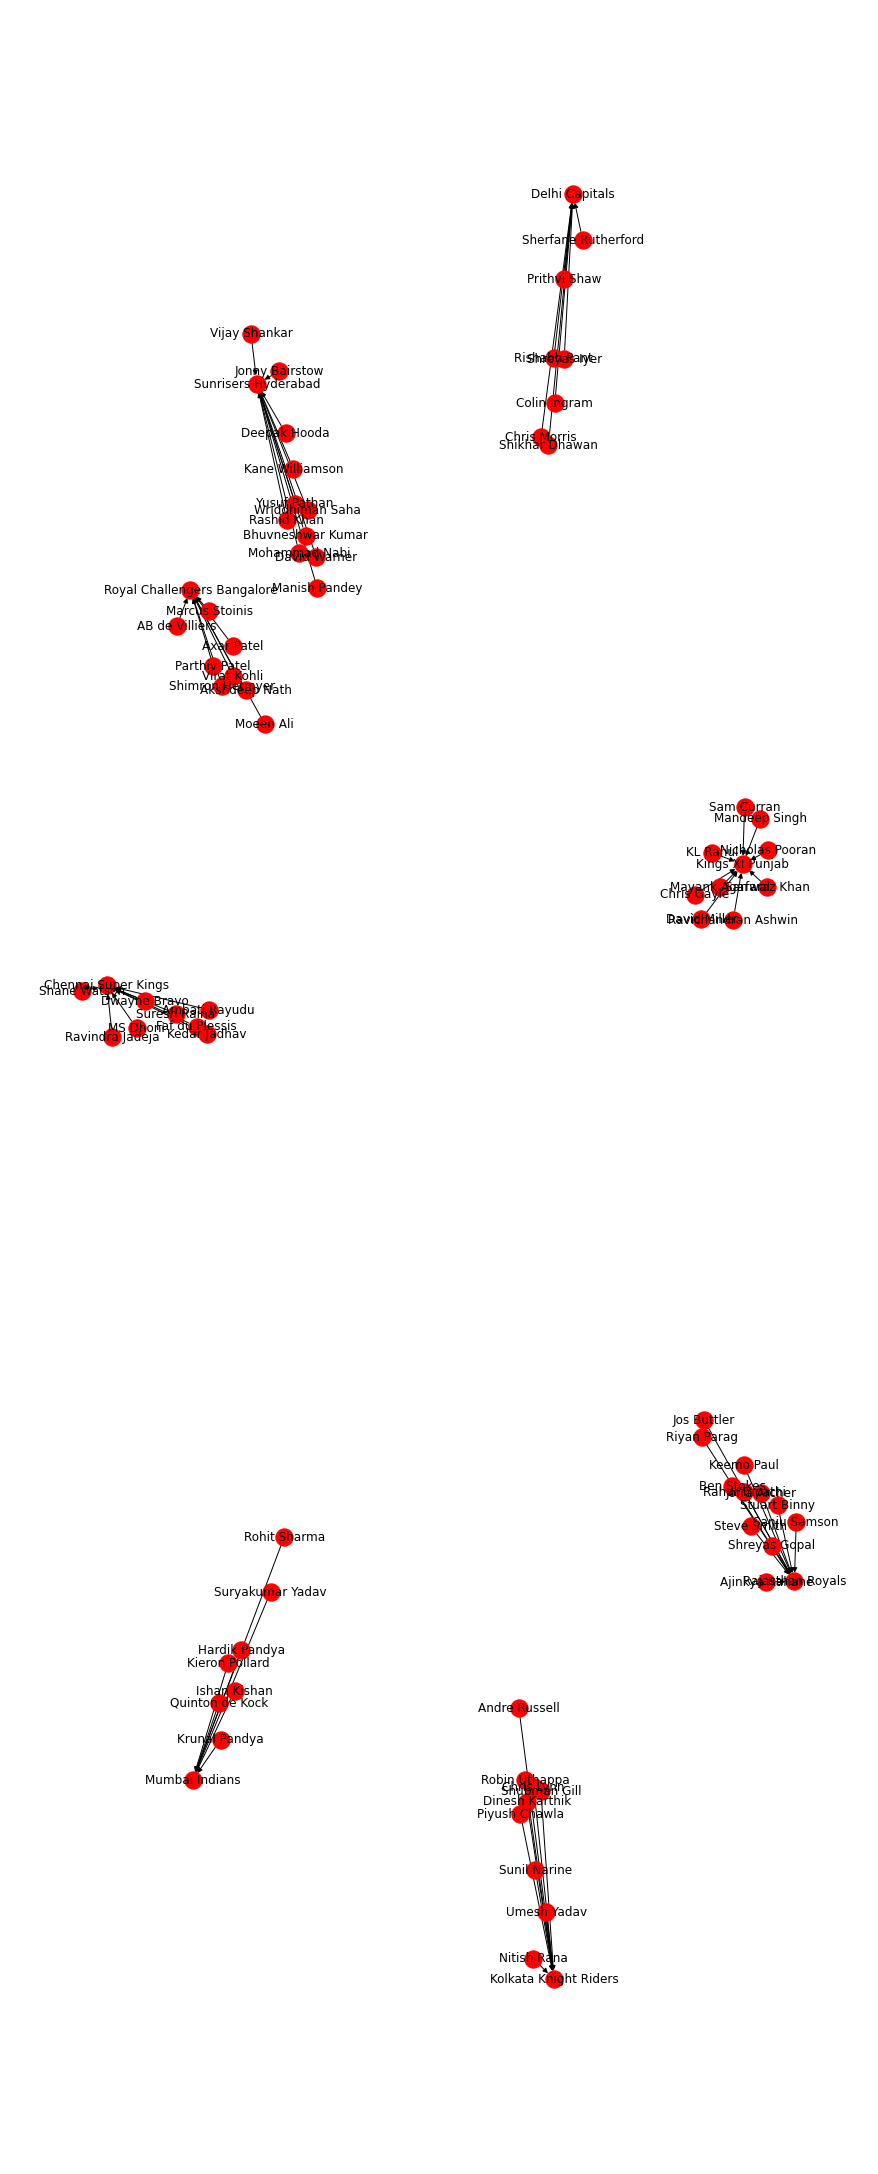

In [314]:
players = df['Player']

captains = df.loc[(df['Avg'] > 40)]
captains = captains.loc[(captains['Hundreds'] + captains['Fifties']) > 0]
captains = captains.loc[captains['Fours'] > captains['Sixes']]
captains = captains.pop('Player')

openers = df.loc[(df['SR'] > 150)]
openers = openers.loc[(openers['Avg'] > 40)]
openers = openers.pop('Player')

middleorder = df.loc[(df['Runs'] > 150)]
middleorder = middleorder.loc[(middleorder['Avg'] > 40)]
middleorder = middleorder.pop("Player")

bowlers = df.loc[(df['SR'] < 120)]
bowlers = bowlers.pop('Player')

g1 = pd.DataFrame()
a = list()
b = list()
c = list()
for i in df['Team']:
  a.append(i)

for i in df['Player']:
  b.append(i)
  c.append('is member of')

g1['Subject'] = b
g1['Object'] = a
g1['Predicate'] = c

import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(g1, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,30))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()



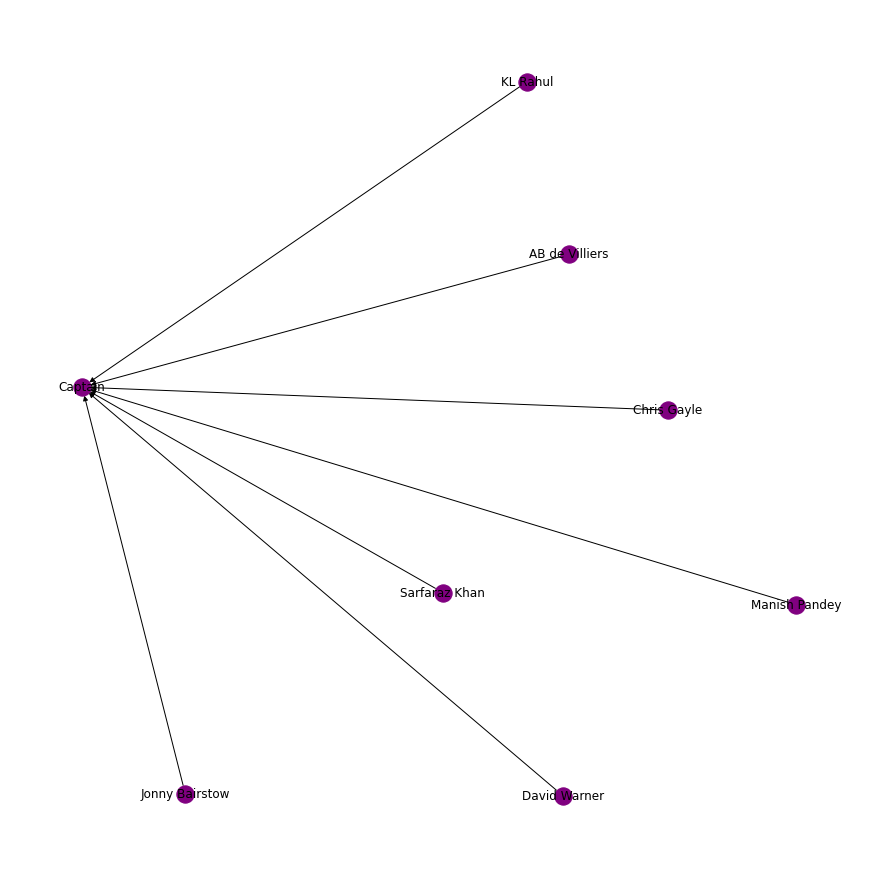

In [322]:
g2 = pd.DataFrame()
a = list()
b = list()
c = list()
for i in range(len(captains)):
  a.append('Captain')

for i in captains:
  b.append(i)
  c.append('is a')

g2['Subject'] = b
g2['Object'] = a
g2['Predicate'] = c

import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(g2, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='purple', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

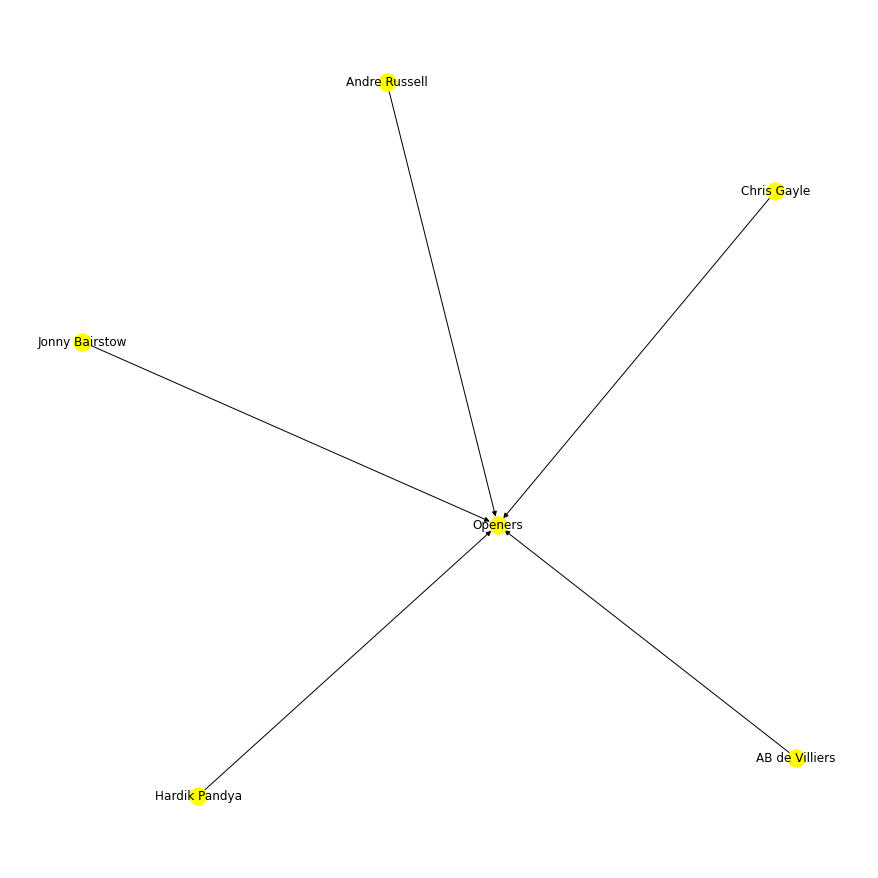

In [321]:
g3 = pd.DataFrame()
a = list()
b = list()
c = list()
for i in range(len(openers)):
  a.append('Openers')

for i in openers:
  b.append(i)
  c.append('is a')

g3['Subject'] = b
g3['Object'] = a
g3['Predicate'] = c

import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(g3, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='yellow', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

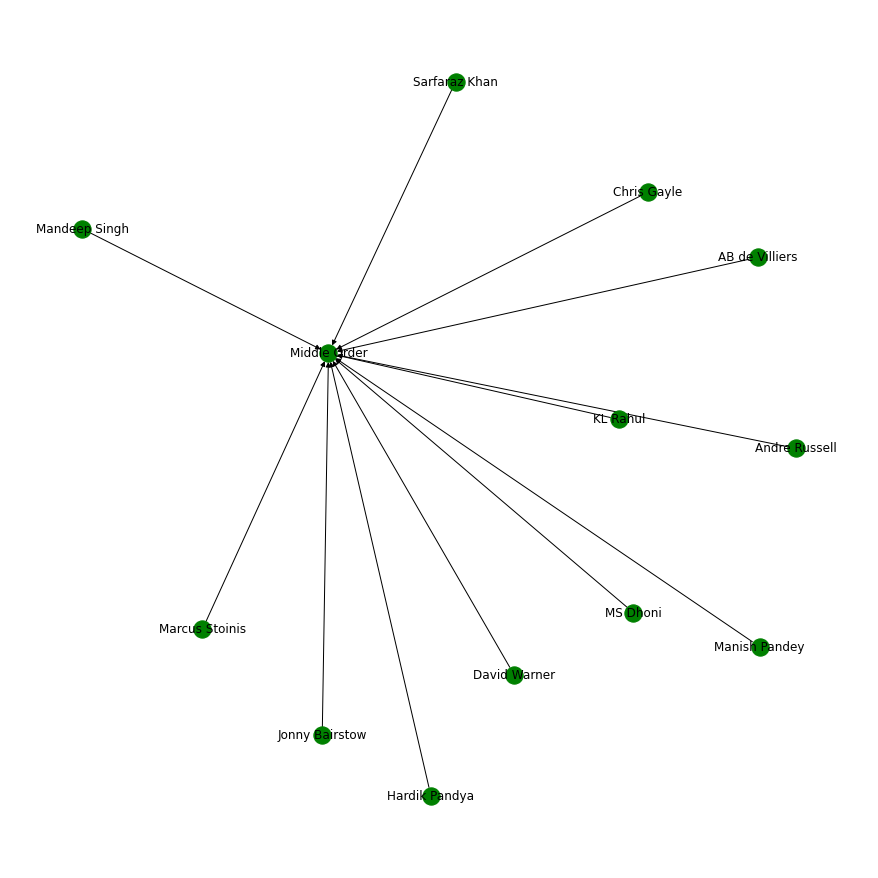

In [320]:
g4 = pd.DataFrame()
a = list()
b = list()
c = list()
for i in range(len(middleorder)):
  a.append('Middle Order')

for i in middleorder:
  b.append(i)
  c.append('is a')

g4['Subject'] = b
g4['Object'] = a
g4['Predicate'] = c

import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(g4, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='green', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

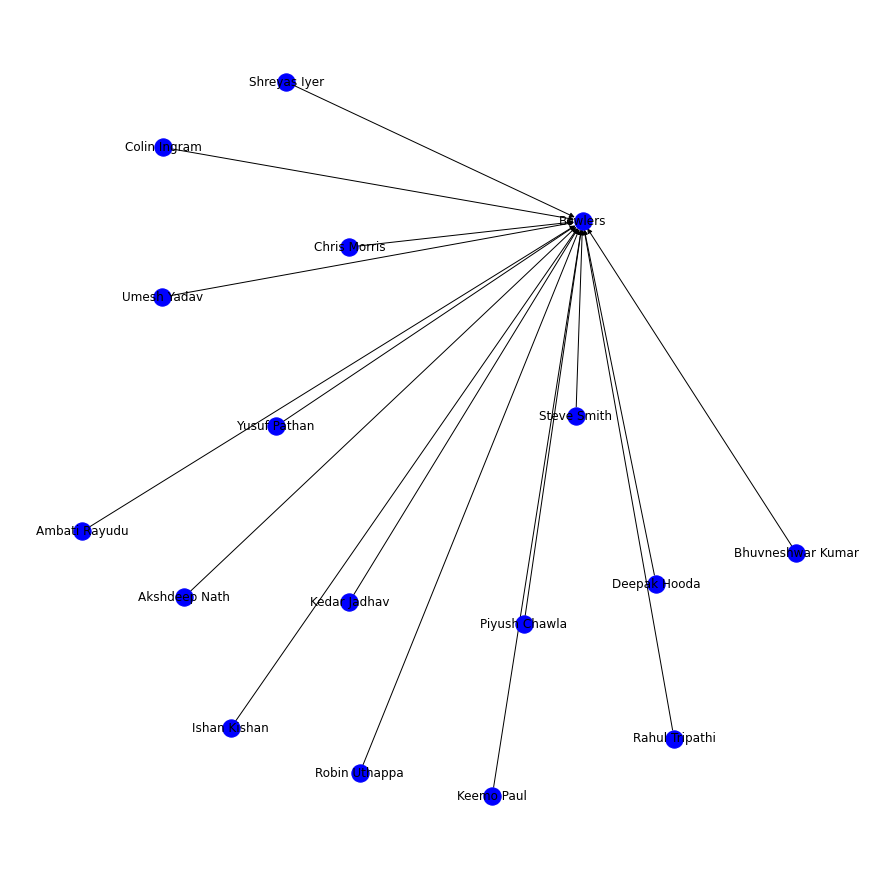

In [319]:
g5 = pd.DataFrame()
a = list()
b = list()
c = list()
for i in range(len(bowlers)):
  a.append('Bowlers')

for i in bowlers:
  b.append(i)
  c.append('is a')

g5['Subject'] = b
g5['Object'] = a
g5['Predicate'] = c

import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(g5, "Subject", "Object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='blue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()